# [Aula 5] Filtragem espacial

Prof. João Fernando Mari (joaofmari@gmail.com)

Universidade Federal de Viçosa - *campus* Rio Paranaíba

SIN 393 - Introdução à Visão Computacional (2018-2)

## Convolução

<img src='figuras/aula-05/Slide3.PNG' style="height:500px">

*FIGURA 1. Exemplo da convolução de uma imagem f(x, y), com 3 bits por uma máscara 3 x 3 w(s, t). O resultado da convolução é obtido aplicando a equação sobre a w(s, t) rotacionada 180o, w'(s, t) e armazenado na imagem g(x, y). Em destaque o calculo do resultado da convolução para o pixel na posição (0, 0).*

<img src='figuras/aula-05/Slide4.PNG' style="height:500px">

*FIGURA 2: Ilustração do calculo da convolução para o pixel na posição (0, 1).*

<img src='figuras/aula-05/Slide18.PNG' style="height:500px">

*FIGURA 3: Ilustração do resultado final da convolução da imagem f(x, y) pela máscara w(s, t).*

## Filtros passa-baixa

Filtros lineares:
* Filtro da média;
* Filtro Gaussiano;
* ...

Filtros não lineares:
* Filtro da mediana;
* Filtro máximo;
* Filtro mínimo;
* ...

### Filtro da média

In [1]:
import numpy as np
from scipy.ndimage import filters
from skimage import img_as_float, data
import matplotlib.pyplot as plt

%matplotlib notebook

Carrega uma imagem em níveis de cinza.

In [2]:
im = data.camera()

Converte a imagem para tipo de dados float [0, 1].

In [3]:
im = img_as_float(im)

In [4]:
print('Tamanho da imagem: %d, %d' % (im.shape[0], im.shape[1]))
print('Tipo de dado: %s' % im.dtype)
print('Menor intensidade: %.4f ' % im.min())
print('Maior intensidade: %.4f ' % im.max())

Tamanho da imagem: 512, 512
Tipo de dado: float64
Menor intensidade: 0.0000 
Maior intensidade: 1.0000 


#### Filtro da média com máscara 3 x 3

Constrói uma máscara 3 x 3, manualmente.

In [5]:
masc_3 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=float)

masc_3 = masc_3 / 9
masc_3

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

Filtra a imagem usando convolução.

In [6]:
media_3 = filters.convolve(im, masc_3)

#### Filtro da média com máscara 5 x 5

In [7]:
masc_5 = np.ones([5, 5], dtype=float)
masc_5 = masc_5 / 25

In [8]:
# Filtro da media com mascara 5x5.
media_5 = filters.convolve(im, masc_5)

#### Filtro da média com máscara 11 x 11

In [9]:
masc_11 = np.ones([11, 11], dtype=float)
masc_11 = masc_11 / (11 * 11)

In [10]:
# Filtro da media com mascara 11 x 11.
media_11 = filters.convolve(im, masc_11)

#### Plota os resultados das filtragens pela média.

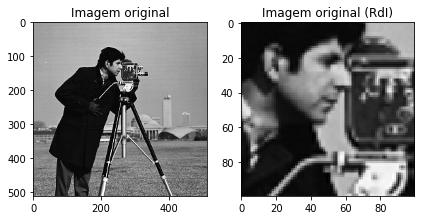

In [11]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.title('Imagem original')
plt.subplot(1,2,2)
plt.imshow(im[100:200, 200:300], cmap='gray')
plt.title('Imagem original (RdI)')

plt.tight_layout()
plt.show()

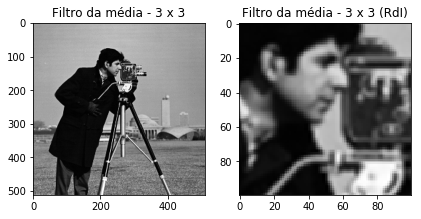

In [12]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(media_3, cmap='gray')
plt.title('Filtro da média - 3 x 3')
plt.subplot(1,2,2)
plt.imshow(media_3[100:200, 200:300], cmap='gray')
plt.title('Filtro da média - 3 x 3 (RdI)')

plt.tight_layout()
plt.show()

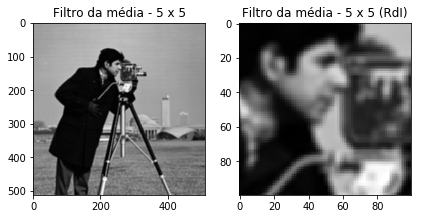

In [13]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(media_5, cmap='gray')
plt.title('Filtro da média - 5 x 5')
plt.subplot(1,2,2)
plt.imshow(media_5[100:200, 200:300], cmap='gray')
plt.title('Filtro da média - 5 x 5 (RdI)')

plt.tight_layout()
plt.show()

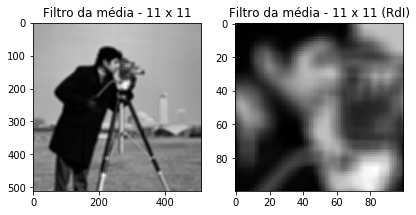

In [14]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(media_11, cmap='gray')
plt.title('Filtro da média - 11 x 11')
plt.subplot(1,2,2)
plt.imshow(media_11[100:200, 200:300], cmap='gray')
plt.title('Filtro da média - 11 x 11 (RdI)')

plt.tight_layout()
plt.show()

## Filtro Gaussiano

Baseado em uma função Gaussiana 2D.

$ℎ(𝑥,𝑦)=𝑒^{−(𝑥^2+𝑦^2)/(2𝜎^2 )}$

Para uma máscara m x n, faz-se uma amostragem ao redor  de seu centro. 

As coordenadas x e y correspondem às coordenadas da máscara.

Para gerar uma máscara 3 x 3 a partir dessa função computa-se a função para:

w1 = h(-1,-1), w2 = h(-1,0), w3 = h(-1,1)

w4 = h( 0,-1), w5 = h( 0,0), w6 = h( 0,1)

w7 = h( 1,-1), w8 = h( 1,0), w9 = h( 1,1)

<img src='figuras/aula-05/FIgXX.FuncaoGaussiana_OK.PNG' style="height:250px">

*FIGURA 4. Ilustração de uma função Gaussiana 2D e uma máscara 5 x 5 gerada a partir de uma função Gaussiana.*

In [15]:
sigmas = [3, 5, 11]
gauss = []
for sigma in sigmas:
    gauss_temp = filters.gaussian_filter(im, sigma=sigma)
    gauss.append(gauss_temp)

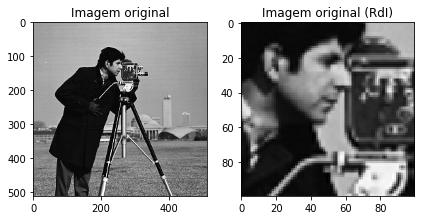

In [16]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.title('Imagem original')
plt.subplot(1,2,2)
plt.imshow(im[100:200, 200:300], cmap='gray')
plt.title('Imagem original (RdI)')

plt.tight_layout()
plt.show()

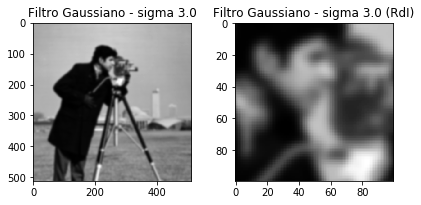

In [17]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(gauss[0], cmap='gray')
plt.title('Filtro Gaussiano - sigma 3.0')
plt.subplot(1,2,2)
plt.imshow(gauss[0][100:200, 200:300], cmap='gray')
plt.title('Filtro Gaussiano - sigma 3.0 (RdI)')

plt.tight_layout()
plt.show()

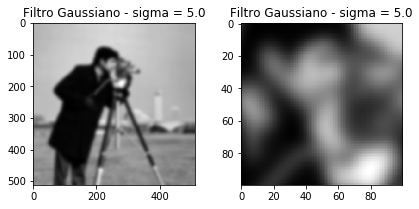

In [18]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(gauss[1], cmap='gray')
plt.title('Filtro Gaussiano - sigma = 5.0')
plt.subplot(1,2,2)
plt.imshow(gauss[1][100:200, 200:300], cmap='gray')
plt.title('Filtro Gaussiano - sigma = 5.0')

plt.tight_layout()
plt.show()

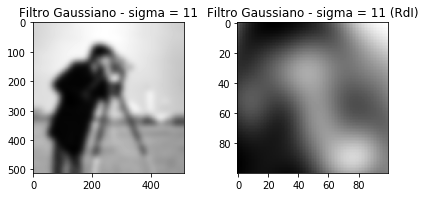

In [19]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(gauss[2], cmap='gray')
plt.title('Filtro Gaussiano - sigma = 11')
plt.subplot(1,2,2)
plt.imshow(gauss[2][100:200, 200:300], cmap='gray')
plt.title('Filtro Gaussiano - sigma = 11 (RdI)')

plt.tight_layout()
plt.show()

### Filtro da mediana

In [20]:
# Filtro da mediana com mascara 3x3.
mediana_3 = filters.median_filter(im, size=3)

# Filtro da mediana com mascara 5x5.
mediana_5 = filters.median_filter(im, size=5)

# Filtro da  mediana com mascara 11.
mediana_11 = filters.median_filter(im, size=11)

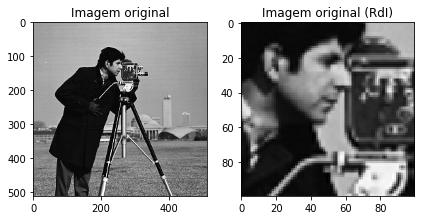

In [21]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.title('Imagem original')
plt.subplot(1,2,2)
plt.imshow(im[100:200, 200:300], cmap='gray')
plt.title('Imagem original (RdI)')

plt.tight_layout()
plt.show()

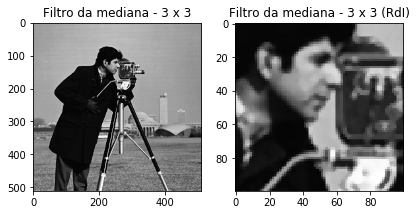

In [22]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(mediana_3, cmap='gray')
plt.title('Filtro da mediana - 3 x 3')
plt.subplot(1,2,2)
plt.imshow(mediana_3[100:200, 200:300], cmap='gray')
plt.title('Filtro da mediana - 3 x 3 (RdI)')

plt.tight_layout()
plt.show()

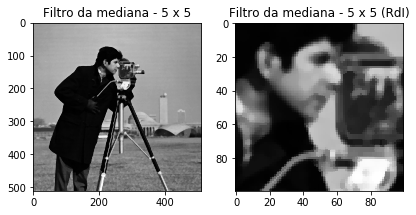

In [23]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(mediana_5, cmap='gray')
plt.title('Filtro da mediana - 5 x 5')
plt.subplot(1,2,2)
plt.imshow(mediana_5[100:200, 200:300], cmap='gray')
plt.title('Filtro da mediana - 5 x 5 (RdI)')

plt.tight_layout()
plt.show()

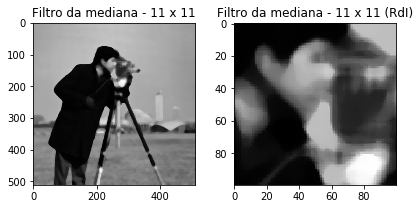

In [24]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(mediana_11, cmap='gray')
plt.title('Filtro da mediana - 11 x 11')
plt.subplot(1,2,2)
plt.imshow(mediana_11[100:200, 200:300], cmap='gray')
plt.title('Filtro da mediana - 11 x 11 (RdI)')

plt.tight_layout()
plt.show()

## Filtros passa-alta

Filtro Laplaciano: 
    * baseado na segunda derivada.
    
Gradiente:
    * baseado na primeira derivada.

<img src='figuras/aula-05/Fig_03.36_OK.PNG' style="height:600px">

*FIGURA 5: Ilustração dos resultado da primeira e segunda derivadas sobre uma função 1D. Fonte: [2]*

### Filtro Laplaciano

<img src='figuras/aula-05/Fig_03.37_OK.PNG' style="height:400px">

*FIGURA 6: Máscaras para filtro Laplaciano. Fonte: [2]*

In [25]:
im = data.camera()

Converte a imagem para float. Valores de intensidade dos pixels entre 0 e 1.

In [26]:
im = img_as_float(im)

Aplica borramento Gaussiano sobre a imagem.

In [27]:
im  = filters.gaussian_filter(im, sigma=3)

In [28]:
# Laplaciano 4
lap_4_ = np.array([[ 0.,  1., 0.],
                   [ 1., -4., 1.],
                   [ 0.,  1., 0.]], dtype=float) 

lap_4 = np.array([[ 0., -1.,  0.],
                  [-1.,  4., -1.],
                  [ 0., -1.,  0.]], dtype=float)

# Laplaciano 8 (Componentes diagonais)
lap_8 = np.array([[-1., -1., -1.],
                  [-1.,  8., -1.],
                  [-1., -1., -1.]], dtype=float)

lap_8_ = np.array([[1.,  1.,  1.],
                   [1., -8.,  1.],
                   [1.,  1.,  1.]], dtype=float)

In [29]:
# Calcula os imagens filtradas pelas máscaras laplacianas.
im_lap_4  = filters.convolve(im, lap_4)
im_lap_4_ = filters.convolve(im, lap_4_)
im_lap_8  = filters.convolve(im, lap_8)
im_lap_8_ = filters.convolve(im, lap_8_)

#### Plota os resultados da filtragem pelo Laplaciano

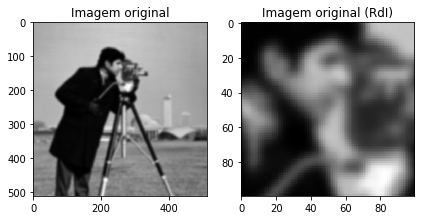

In [30]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.title('Imagem original')
plt.subplot(1,2,2)
plt.imshow(im[100:200, 200:300], cmap='gray')
plt.title('Imagem original (RdI)')

plt.tight_layout()
plt.show()

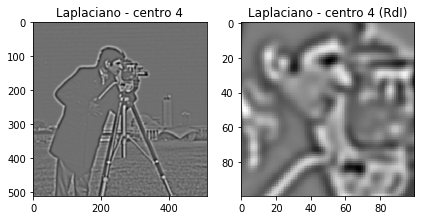

In [31]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(im_lap_4, cmap='gray')
plt.title('Laplaciano - centro 4')
plt.subplot(1,2,2)
plt.imshow(im_lap_4[100:200, 200:300], cmap='gray')
plt.title('Laplaciano - centro 4 (RdI)')

plt.tight_layout()
plt.show()

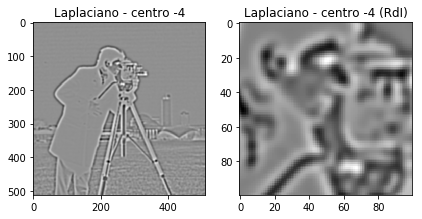

In [32]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(im_lap_4_, cmap='gray')
plt.title('Laplaciano - centro -4')
plt.subplot(1,2,2)
plt.imshow(im_lap_4_[100:200, 200:300], cmap='gray')
plt.title('Laplaciano - centro -4 (RdI)')

plt.tight_layout()
plt.show()

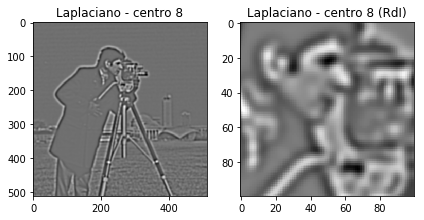

In [33]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(im_lap_8, cmap='gray')
plt.title('Laplaciano - centro 8')
plt.subplot(1,2,2)
plt.imshow(im_lap_8[100:200, 200:300], cmap='gray')
plt.title('Laplaciano - centro 8 (RdI)')

plt.tight_layout()
plt.show()

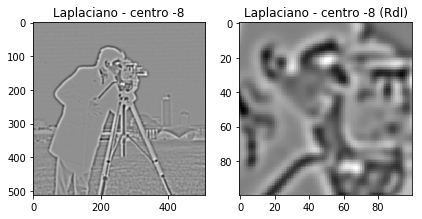

In [34]:
# Mostra as imagens na tela.
plt.figure()

plt.subplot(1,2,1)
plt.imshow(im_lap_8_, cmap='gray')
plt.title('Laplaciano - centro -8')
plt.subplot(1,2,2)
plt.imshow(im_lap_8_[100:200, 200:300], cmap='gray')
plt.title('Laplaciano - centro -8 (RdI)')

plt.tight_layout()
plt.show()

### O gradiente

#### Gradiente de Roberts

<img src='figuras/aula-05/Fig_03.41_OK.png' style="height:200px">

*FIGURA 6: Máscaras para o Gradiente de Roberts. Fonte: [2]*

In [35]:
# Operadores diagonais de Roberts
rob_d1 = np.array([[-1., 0.],
                   [ 0., 1.]], dtype=float)

rob_d2 = np.array([[0., -1.],
                   [1.,  0.]], dtype=float)

In [36]:
im_rob_d1  = filters.convolve(im, rob_d1)
im_rob_d2  = filters.convolve(im, rob_d2)

# Magnitude do gradiente (hipotenusa)
im_rob = np.sqrt(im_rob_d1**2 + im_rob_d2**2)
# Magnitude do gradiente (aproximado)
im_rob_a = np.abs(im_rob_d1) + np.abs(im_rob_d2)

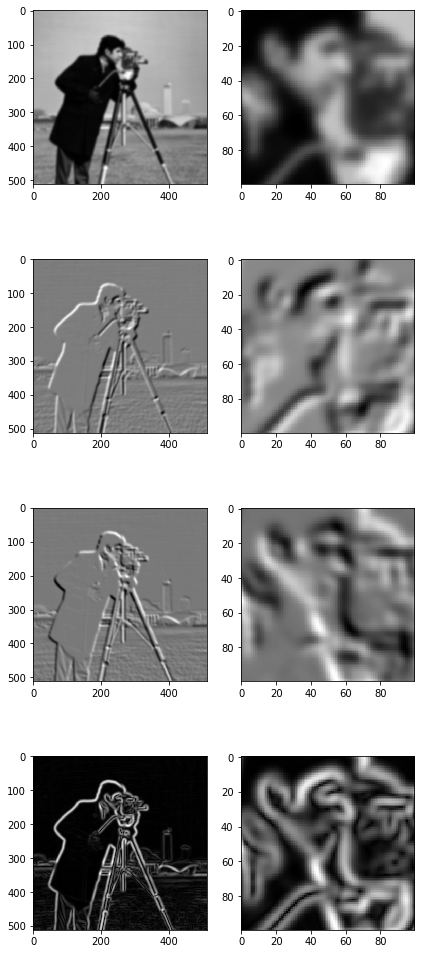

In [37]:
# Figura com 1 linha e duas colunas
fig, ax = plt.subplots(4, 2, figsize=(6, 14))

ax[0, 0].imshow(im, cmap='gray')
ax[0, 1].imshow(im[100:200, 200:300], cmap='gray')

ax[1, 0].imshow(im_rob_d1, cmap='gray')
ax[1, 1].imshow(im_rob_d1[100:200, 200:300], cmap='gray')

ax[2, 0].imshow(im_rob_d2, cmap='gray')
ax[2, 1].imshow(im_rob_d2[100:200, 200:300], cmap='gray')

ax[3, 0].imshow(im_rob, cmap='gray')
ax[3, 1].imshow(im_rob[100:200, 200:300], cmap='gray')
    
plt.tight_layout()
plt.show()

#### Gradiente de Prewitt

<img src='figuras/aula-05/Fig.prewitt.png' style="height:200px">

FIGURA X: Máscaras para o Gradiente de Prewitt.

In [38]:
# Operadores de Prewitt
pre_h = np.array([[-1., -1., -1.],
                  [ 0.,  0.,  0.],
                  [ 1.,  1.,  1.]], dtype=float)

pre_v = np.array([[-1.,  0.,  1.],
                  [-1.,  0.,  1.],
                  [-1.,  0.,  1.]], dtype=float)

In [39]:
# Gradiente de Prewitt.
im_pre_h  = filters.convolve(im, pre_h)
im_pre_v  = filters.convolve(im, pre_v)

# Magnitude do gradiente (hipotenusa)
im_pre = np.sqrt(im_pre_h**2 + im_pre_v**2)
# Magnitude do gradiente (aproximado)
im_pre_a = np.abs(im_pre_h) + np.abs(im_pre_v)

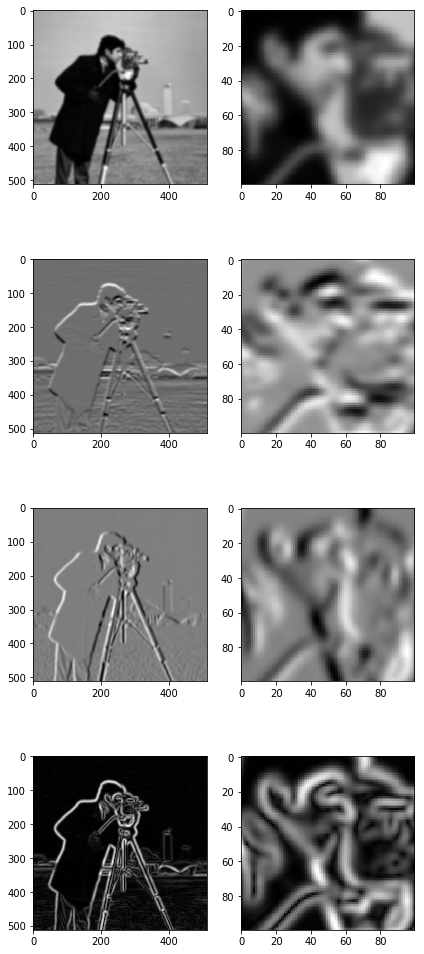

In [40]:
# Figura com 1 linha e duas colunas
fig, ax = plt.subplots(4, 2, figsize=(6, 14))

ax[0, 0].imshow(im, cmap='gray')
ax[0, 1].imshow(im[100:200, 200:300], cmap='gray')

ax[1, 0].imshow(im_pre_h, cmap='gray')
ax[1, 1].imshow(im_pre_h[100:200, 200:300], cmap='gray')

ax[2, 0].imshow(im_pre_v, cmap='gray')
ax[2, 1].imshow(im_pre_v[100:200, 200:300], cmap='gray')

ax[3, 0].imshow(im_pre, cmap='gray')
ax[3, 1].imshow(im_pre[100:200, 200:300], cmap='gray')
    
plt.tight_layout()
plt.show()

#### Gradiente de Sobel

<img src='figuras/aula-05/Fig.sobel.png' style="height:200px">

*FIGURA X: Máscaras para o Gradiente de Sobel.*

In [41]:
# Operadores de Sobel
sob_h = np.array([[-1., -2., -1.],
                  [ 0.,  0.,  0.],
                  [ 1.,  2.,  1.]], dtype=float)

sob_v = np.array([[-1.,  0.,  1.],
                  [-2.,  0.,  2.],
                  [-1.,  0.,  1.]], dtype=float)

In [42]:
# Gradiente de Sobel.
im_sob_h  = filters.convolve(im, sob_h)
im_sob_v  = filters.convolve(im, sob_v)

# Magnitude do gradiente (hipotenusa)
im_sob = np.sqrt(im_sob_h**2 + im_sob_v**2)
# Magnitude do gradiente (aproximado)
im_sob_a = np.abs(im_sob_h) + np.abs(im_sob_v)

NameError: name 'make_axes_locatable' is not defined

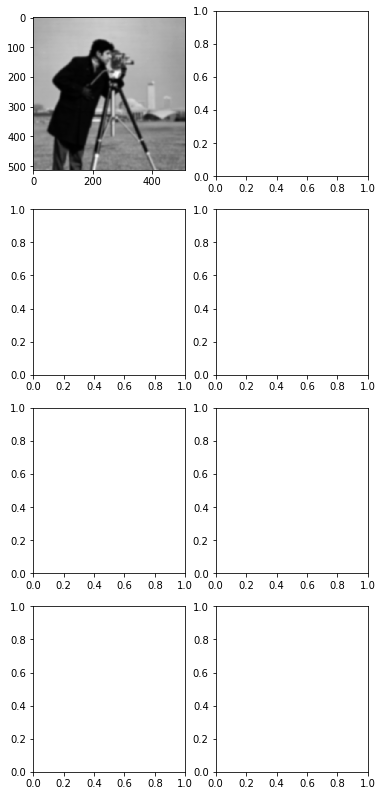

In [43]:
# Figura com 1 linha e duas colunas
fig, ax = plt.subplots(4, 2, figsize=(6, 14))

ax[0, 0].imshow(im, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax[0, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)

ax[0, 1].imshow(im[100:200, 200:300], cmap='gray')

ax[1, 0].imshow(im_sob_h, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax[1, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)

ax[1, 1].imshow(im_sob_h[100:200, 200:300], cmap='gray')

ax[2, 0].imshow(im_sob_h, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax[2, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)

ax[2, 1].imshow(im_sob_h[100:200, 200:300], cmap='gray')

ax[3, 0].imshow(im_sob, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax[3, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)

ax[3, 1].imshow(im_sob[100:200, 200:300], cmap='gray')
    
plt.tight_layout()
plt.show()

## Bibliografia

[1] **Scipy Lecture Notes**. 2017
    * Disponível em: http://www.scipy-lectures.org/

<img src='figuras/scipy_ln_OK.png' style="height:500px">

[2] GONZALEZ, R.C.; WOODS, R.E. Processamento de Imagens Digitais. 3. ed. Pearson, 2010.